### DT Model Implementation with Data1

In [30]:
import pandas as cloudEmail_pns
import warnings as cloudEmail_wns
cloudEmail_wns.filterwarnings('ignore')
import matplotlib.pyplot as cloudEmail_mpt

In [31]:
cloudEmail1 = cloudEmail_pns.read_csv('Research_data1.csv')
cloudEmail1

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,1
1,side galicismos galicismo spanish term names i...,1
2,equistar deal tickets still available assist r...,1
3,hello hot lil horny toy one dream open minded ...,0
4,software incredibly low prices lower drapery s...,0
...,...,...
17533,rick moen crit confused thought gpl ed money p...,1
17534,date lonely housewife always wanted date lonel...,0
17535,request submitted access request anita dupont ...,1
17536,important prc mtg hi dorn john discovered rece...,1


In [32]:
cloudEmail1.info()  ##---- Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  17536 non-null  object
 1   Email Type  17538 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 274.2+ KB


In [33]:
cloudEmail1['Email Type'].value_counts()

Email Type
1    10980
0     6558
Name: count, dtype: int64

In [34]:
cloudEmail1.isnull().sum()  ##---- Missing Values for each column

Email Text    2
Email Type    0
dtype: int64

In [35]:
from collections import Counter as cloudEmail_balanceCount
from imblearn.over_sampling import SMOTE as cloudEmail_balanceSmote
from sklearn.feature_extraction.text import TfidfVectorizer as cloudEmail_TFVNumerical

cloudEmail1.dropna(subset=['Email Text'], inplace=True)
cloudEmail_X1 = cloudEmail1['Email Text']
cloudEmail_y1 = cloudEmail1['Email Type']

cloudTFMod = cloudEmail_TFVNumerical(analyzer='word', ngram_range=(1, 1))
cloudEmail_X1 = cloudTFMod.fit_transform(cloudEmail_X1)
print("Research Data1 Numerical Dimensions are : ", cloudEmail_X1.shape)

print('\nEmail Phishing Data1  %s' % cloudEmail_balanceCount(cloudEmail_y1))
cloudEmod = cloudEmail_balanceSmote()
cloudEmail_X1, cloudEmail_y1 = cloudEmod.fit_resample(cloudEmail_X1, cloudEmail_y1)
import joblib 
print('Balanced Email Phishing Data1 %s' % cloudEmail_balanceCount(cloudEmail_y1))

Research Data1 Numerical Dimensions are :  (17536, 147793)

Email Phishing Data1  Counter({1: 10980, 0: 6556})
Balanced Email Phishing Data1 Counter({1: 10980, 0: 10980})


In [36]:
import joblib 

joblib.dump(cloudTFMod, "TfidfVectorizer_Model.h5")
print("TfidfVectorizer model saved as TfidfVectorizer_Model.h5")

loaded_TFIDF = joblib.load("TfidfVectorizer_Model.h5")

TfidfVectorizer model saved as TfidfVectorizer_Model.h5


In [37]:
print("Research Data1 Dimension Shape: ",cloudEmail_X1.shape)

Research Data1 Dimension Shape:  (21960, 147793)


In [38]:
from sklearn.decomposition import PCA as cloudEmail_phishPCA

cloudPCA = cloudEmail_phishPCA(n_components = 30)
cloudEmail_X1 = cloudPCA.fit_transform(cloudEmail_X1)
print("Research Data1 Dimension Reduction Shape: ", cloudEmail_X1.shape)

Research Data1 Dimension Reduction Shape:  (21960, 30)


In [39]:
joblib.dump(cloudPCA, "PCA_Model.h5")
print("PCA model saved as PCA_Model.h5")

loaded_PCA = joblib.load("PCA_Model.h5")

PCA model saved as PCA_Model.h5


In [40]:
from sklearn.model_selection import train_test_split as cloudEmail_phishSp
cloudEmail_X1tr, cloudEmail_X1ts, cloudEmail_y1tr, cloudEmail_y1ts = cloudEmail_phishSp(cloudEmail_X1, cloudEmail_y1, test_size=0.4, random_state=32)

In [41]:
print("60% Train Data1",cloudEmail_X1tr.shape)
print("40% Test Data1",cloudEmail_X1ts.shape)

60% Train Data1 (13176, 30)
40% Test Data1 (8784, 30)


In [42]:
from sklearn.model_selection import RandomizedSearchCV as cloudEmail_RDSCV
from sklearn.metrics import ConfusionMatrixDisplay as cloudEmail_phishDisp
from sklearn.metrics import confusion_matrix as cloudEmail_phishMatx
from sklearn.metrics import classification_report as cloudEmail_phishReport
from sklearn import metrics as cloudEmail_phishMetr
import time as cloudEmail_phishTime

In [43]:
from sklearn.tree import DecisionTreeClassifier as cloudEmail_phishDecisionTr
cloudParameters = {'criterion':['gini','entropy','log_loss'],'splitter': ['best','random'],'max_depth': [3,4,7,8]
                }
cloud_EmailMod = cloudEmail_phishDecisionTr(random_state=32)
cloud_EmailMod = cloudEmail_RDSCV(cloud_EmailMod, cloudParameters, cv=2)
cloud_EmailMod.fit(cloudEmail_X1tr[:800], cloudEmail_y1tr[:800])
print("\nRandomized Search Parameters for Decision Tree:\n",cloud_EmailMod.best_params_)


Randomized Search Parameters for Decision Tree:
 {'splitter': 'best', 'max_depth': 8, 'criterion': 'gini'}


In [44]:
##------ Training
Email_STime = cloudEmail_phishTime.time()
cloud_EmailMod = cloudEmail_phishDecisionTr(**cloud_EmailMod.best_params_)
cloud_EmailMod.fit(cloudEmail_X1tr, cloudEmail_y1tr)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Train Research Data1 : ", Email_ENTime - Email_STime)

Time to Train Research Data1 :  0.393169641494751


Time to Test Research Data2 :  0.0
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4360
           1       0.95      0.93      0.94      4424

    accuracy                           0.94      8784
   macro avg       0.94      0.94      0.94      8784
weighted avg       0.94      0.94      0.94      8784



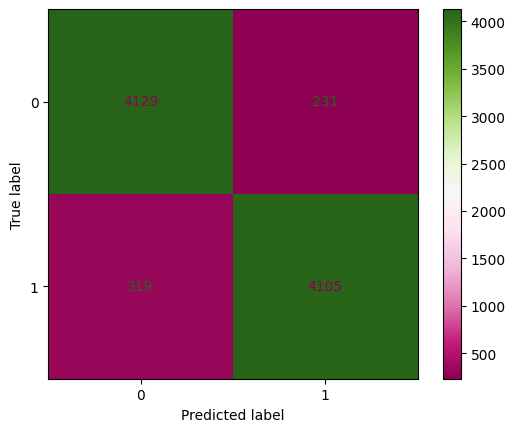

In [45]:
##------ Testing
Email_STime = cloudEmail_phishTime.time()
cloudEmail_yp = cloud_EmailMod.predict(cloudEmail_X1ts)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Test Research Data2 : ", Email_ENTime - Email_STime)

print(cloudEmail_phishReport(cloudEmail_y1ts, cloudEmail_yp))
cloudMx = cloudEmail_phishMatx(cloudEmail_y1ts, cloudEmail_yp)
cloudEmail_phishDisp(confusion_matrix = cloudMx, display_labels = [0,1]).plot(cmap='PiYG')
cloudEmail_mpt.show()

In [46]:
import joblib as cloudEmail_phishLib
cloudEmail_phishLib.dump(cloud_EmailMod, "Email_DTModel1.h5")
cloud_EmailMod

DecisionTreeClassifier(max_depth=8)